In [1]:
import os
import shutil
import subprocess

# Linux
artifact_name = "libanalysis.so"
library_name = "analysis.so"

# Windows
#artifact_name = "libanalysis.dll"
#library_name = "analysis.pyd"

# macOS
#artifact_name = "libanalysis.dylib"
#library_name = "analysis.so"

subprocess.run(
    ["cargo", "build", "--example", "analysis", "--features", "tools"],
    text=True,
)

_ = shutil.copy2(f"../../target/debug/examples/{artifact_name}", library_name)

    Finished dev [optimized + debuginfo] target(s) in 0.05s


In [2]:
import analysis
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
average_magnitude = {}

for position in json.load(open("../comparison_set.json")):
    exp = analysis.explain_model_6s(position, 2000)
    
    for feature_weight in exp.feature_weights:
        feature = average_magnitude.get(feature_weight.feature, { "samples": 0, "magnitude": 0 })
        feature["samples"] += 1
        feature["magnitude"] += (abs(feature_weight.weight) - feature["magnitude"]) / feature["samples"]
        average_magnitude[feature_weight.feature] = feature

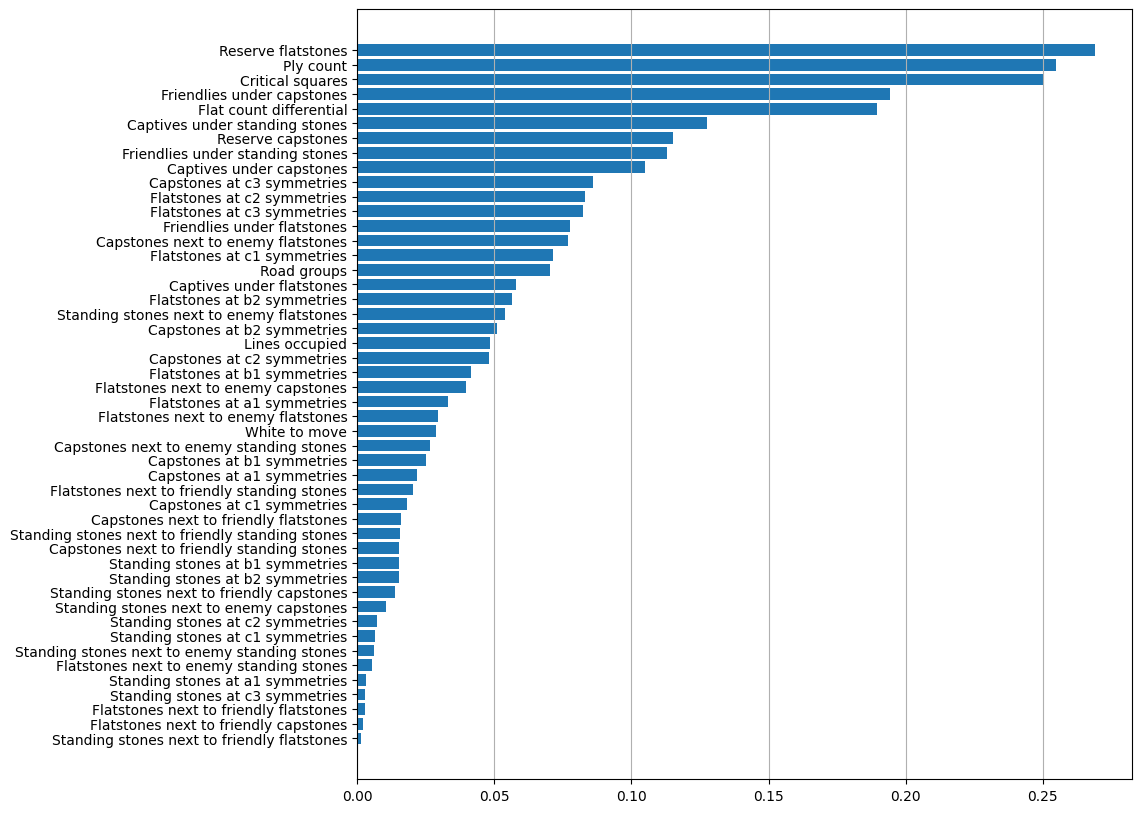

In [4]:
matplotlib.rc('figure', figsize=(10, 10))

features = sorted(average_magnitude.items(), key=lambda f: f[1]["magnitude"])

y = np.arange(len(features))

ax = plt.gca()
ax.grid(True, which="major", axis="x")
ax.barh(y, [f[1]["magnitude"] for f in features])
ax.set_yticks(y, labels=[f[0] for f in features])

plt.show()